#8. Comparing Gaussian means
### 가설 검증
1960년대 미국 남부에서 배심원 선정에 대한 인종 편견이 문제가 되었다.

이론적으로 배심원 명부는 자격이 있는 시민들 중에서 무작위로 선정되지만 

남부주에서는 자격이 있는 시민들 중 50% 흑인이지만, 배심원 명부에 등재된 80명중에서 흑인이 4명뿐이였다.

그리서 피고들이 배심원들의 평결에 이의를 제기했고, 항소심에서 참고인으로 증언했다.
#### 80명의 배심원에서 4명만 흑인이 될 확률
d를 붙이면 확률밀도함수(probability density function)

p를 붙이면 누적밀도함수(cumulation density function)

In [1]:
options(scipen=999)
pbinom(4, 80, prob=0.5) 

[1] 0.000000000000000001378894

## 가설검증의 4단계
###1단계. 모든 가설을 세운다
$H_0, 귀무가설(영가설)$
앞의 예에서 배심원이 전체 모집단에서 무작위로 선정된 것이 $H_0$ 흑인이 선정될 확률은 $p=0.5$
$H_1, 대립가설$
흑인이 배심원으로 선정될 확률이 $p<0.5$
###2단계. 검증통계량
귀무가설에 반대되는 증거를 평가할 통계량을 정한다.$p=0.5, n=80$인 이항확률변수 X임
###3단계. p값
귀무가설이 사실이라면, 검증통계량이 관측될 확율을 구한다. 
$pbinom(4, 80, prob=0.5) = 0.0000000000000000014$
###4단계. p값과 유의수준 $\alpha$를 비교한다
$\alpha$는 어떤 결과가 통계적으로 의미 있다고 판단하는 기준점(0.05, 0.01을 많이 사용)

즉 $p-value \le \alpha$ 이면 귀무가설 $H_0$를 기각한다.(위의 예에서는 판사가 귀무가설을 기각함)

### SMM Model(Seasonal Memory Model) of Dr John
### SMM predicts that a glucose-driven increase in recall performance is more pronounced in summer than in winter
##Recall performance(Dr John) : summer > winter

## but Dr Smith find the opposite result
### the in recall performance is smaller in summer than in winter
## Recall performance(Dr Smith) : summer < winter

In [2]:
# t-test example
# 1. Group Selection(2 Group of Monthly Salary)
Winter = c(-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,
            0.17,0.17,0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,0.04,0.25,0.12)

Summer = c(0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,-0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,
            0.00,0.00,0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,0.00,0.50,0.00)
summary(Winter)
summary(Summer)
sd(Winter) # Standard Deviation Winter
sd(Summer) # Standard Deviation Summer

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1300  0.0000  0.0800  0.1076  0.2100  0.4200 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.38000  0.00000  0.00000  0.07341  0.25000  0.50000 

[1] 0.1454266

[1] 0.2253842

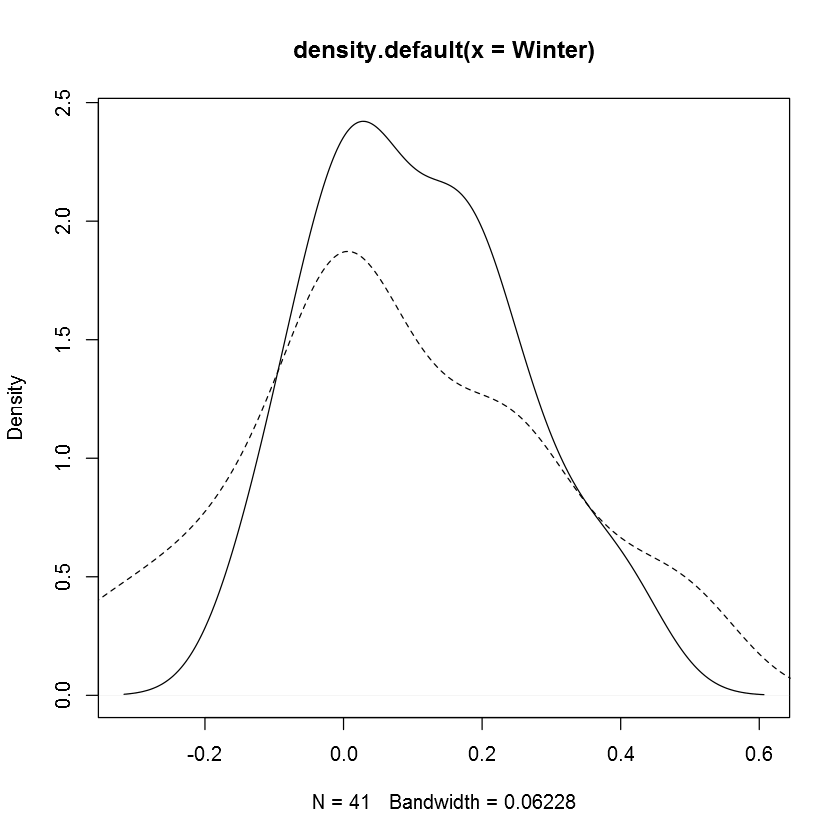

In [9]:
# 2. Density
options(jupyter.plot_mimetypes = 'image/png')
plot(density(Winter))
lines(density(Summer), lty=2)

### (Dr John) : summer > winter의 주장과 반대되는 
### Dr Smith) : summer < winter 주장에 대하여
### $H_0 : (Winter - Summer)의 평균(\mu)은 0보다 작다란 귀무 가설을 수립한다(\mu < 0)$
### $H_1 : \mu \ge 0$
### 유의 수준($\alpha$)는 0.05로 한다.($\alpha = 0.05$)

### $p-value \le \alpha$ 이면 귀무가설 $H_0$를 기각한다

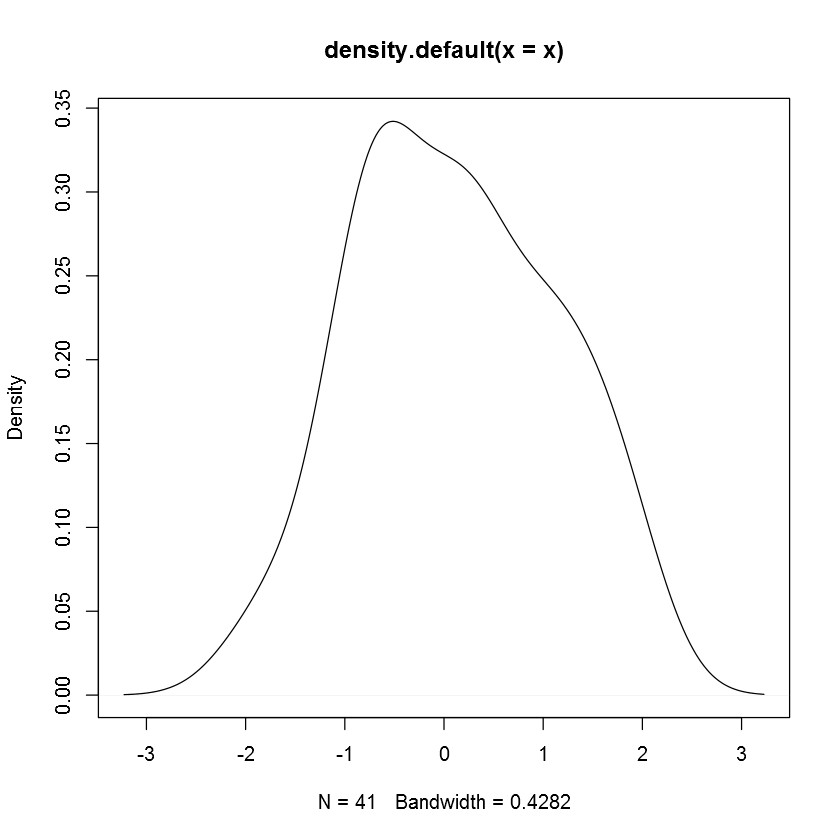

In [10]:
options(jupyter.plot_mimetypes = 'image/png')
x = Winter-Summer # allowed because it is a within-subjects design
x = x/sd(x)       # standardize N(u/sd, 1)
plot(density(x))

In [7]:
# t-test(p-value = 0.4365)
t.test(x, var.equal=T, alt='two.sided')


	One Sample t-test

data:  x
t = 0.7861, df = 40, p-value = 0.4365
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.1928746  0.4384033
sample estimates:
mean of x 
0.1227643 


### $p-value \le \alpha$ 이면 귀무가설 $H_0$를 기각한다란 전제에서
### p-value(0.4365)에서 $\alpha$(0.05)보다 크므로(p-value > $\alpha$) 귀무가설을 기각할 수 없다

#8.1 One-sample comparison
하나의 샘플에 대하여 t-test 수행시에 샘플 데이터는 정규분포 $N(\mu, \sigma)$에 따른다고 가정한다.
 
Dr Smith의 실험데이터(winter-sumer)는 겨울에서 여름의 점수를 빼고 표준화($\sigma$로 나눔)한 예이다.
 
Stanardized difference scores(ie., "winter scores - summer scores")

영가설(귀무가설)은 차이(winter-summer)의 평균은 "0" : $H_0 : \mu = 0$

대립가설은 차이(winter-summer)의 평균은 "0"이 아님 : $H_1 : \mu \ne 0$

###영향도($\delta$, effect size)의 사전 확율(prior)에 cauchy(0,1)분포를 사용한다.

####Cauchy 분포의 확률밀도함수(Probability Density Function)은
$f(x;0,1)=\frac{1}{\pi(1+x^2)}$ 이며
#### 연속분산함수는
$F(x;0,1)=\frac{1}{pi}\arctan(x)+\frac{1}{2}$

[1] 0.3183099

[1] 0.5

[1] 0

[1] -0.8100055  2.4940897  9.5409401 -3.5370073  2.0146959

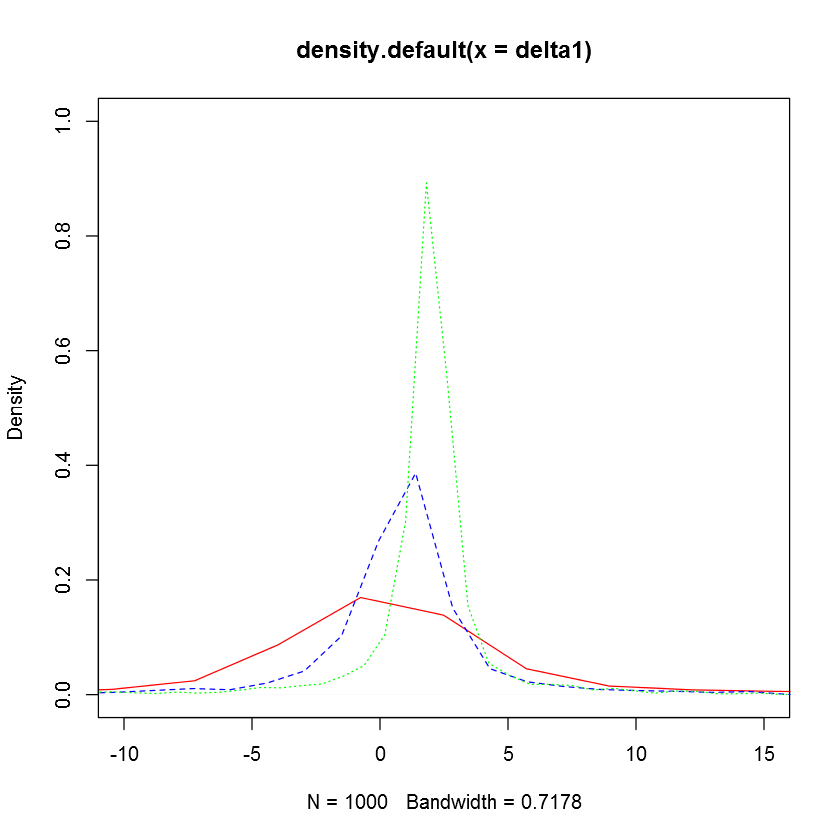

In [9]:
options(jupyter.plot_mimetypes = 'image/png')
dcauchy(0, location=0, scale=1)
pcauchy(0, location=0, scale=1)
qcauchy(0.5, location=0, scale=1) # quantiles(50%)
rcauchy(5, location=0, scale=1)

delta1=rcauchy(1000,location=0, scale=2 )
delta2=rcauchy(1000,location=1, scale=1 )
delta3=rcauchy(1000,location=2, scale=0.5 )
par(mfrow=c(1,1))
plot(density(delta1), xlim=c(-10, 15),ylim=c(0,1), lty=1, col='red')
lines(density(delta2), lty=2,col='blue')
lines(density(delta3), lty=3,col='green')

###표준편차($\sigma$)는 half-Cauchy 분포를 사용하며 양수(Positive)로만 구성됨
$\sigma=Cauchy(0,1)_{X(0, \infty)}$ 

#### $\delta$(effect size)에 대한 영가설(귀무가설)은 $H_0 : \delta=0$
#### 대립가설은 Cauchy 분포를 가진다 : $H_1 : \delta \sim Cauchy(0,1)$

###$delta \sim Cauchy(0,1)$  : effect size
###$\sigma \sim Cauchy(0,1)_{X(0,\infty)}$ : 표준편차(양수의 Cauchy 분포
###$\mu \leftarrow \delta\sigma$ : 평균은 effect size와 표준편차의 곱
###$x_i \sim Gaussian(\mu, \frac{1}{\sigma^2})$ : 정밀도 $\lambda = \frac{1}{\sigma^2}$

In [ ]:
# One-Sample Comparison of Means
modelString = "
model{
  # Data
  for (i in 1:ndata){
    x[i] ~ dnorm(mu,lambda)
  } 
  mu <- delta*sigma
  lambda <- pow(sigma,-2)
  # delta and sigma Come From (Half) Cauchy Distributions
  lambdadelta ~ dchisqr(1)
  delta ~ dnorm(0,lambdadelta)
  lambdasigma ~ dchisqr(1)
  sigmatmp ~ dnorm(0,lambdasigma)
  sigma <- abs(sigmatmp)  
  # Sampling from Prior Distribution for Delta
  deltaprior ~ dnorm(0,lambdadeltaprior)
  lambdadeltaprior ~ dchisqr(1)
}

#### WINBUGS에서는 Cauchy 분포를 사용할 수 없기 때문에
#### $\sigma \sim Gaussian(0, \lambda_{\delta})$ 사용하였으며 
#### $\lambda_{\delta} \sim X^2(1)$ chi_square 분포를 따른다.(자유도 df=1)

###chi-square(Chi-square Distribution)
##### 자유도(df)가 커질 수록 정규분포에 가까워 진다.
#### ncp(non-centrality parameter)는 선택값이다.
#####dchisq(0, df=1) # chisq(0,1)의 0에서의 밀도 함수값
#####pchisq(0, df=1) # chisq(0,1)의 0까지의 누적밀도 함수값
#####qchisq(0.5, df=1) #chisq(0,1)의 50% 분위수 값
#####rchisq(5, df=1) # N(0,1)를 따르는 난수 5개 발생

In [1]:
dchisq(0, df=10)
pchisq(0, df=10)
qchisq(0.5, df=10)
rchisq(5, df=10)

[1] 0

[1] 0

[1] 9.341818

[1] 3.044953 9.978780 3.655231 8.883599 8.736984

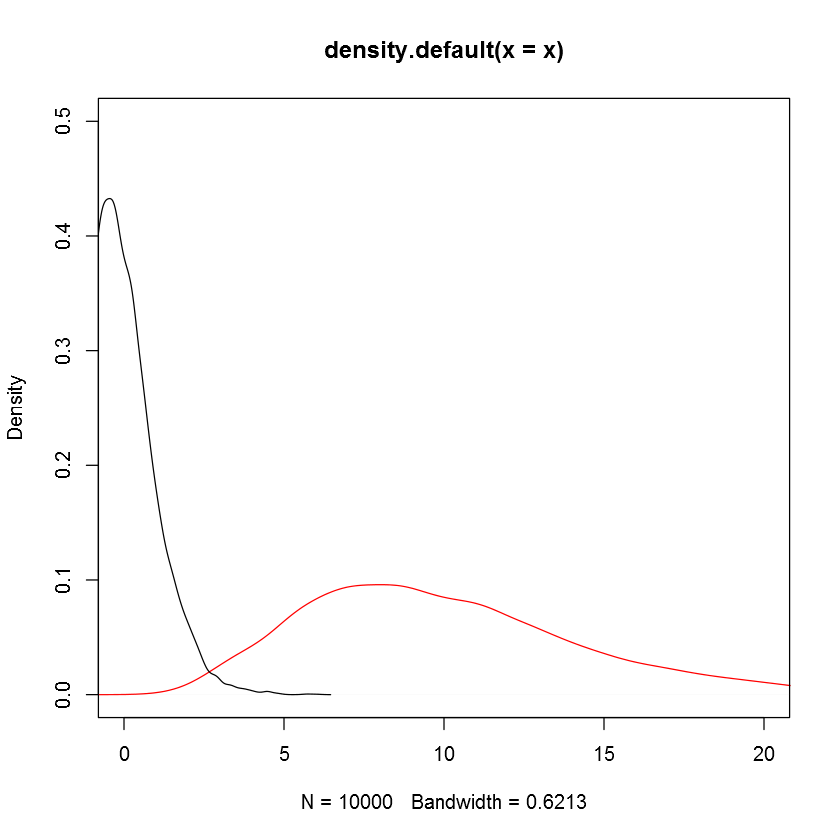

In [8]:
options(jupyter.plot_mimetypes = 'image/png')
x=rchisq(10000, df=10)
z=(x-mean(x))/(sd(x)) # z transformaction
plot(density(x), xlim=c(0,20), ylim=c(0,0.5), col='red')
lines(density(z), col='black')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 55

Initializing model



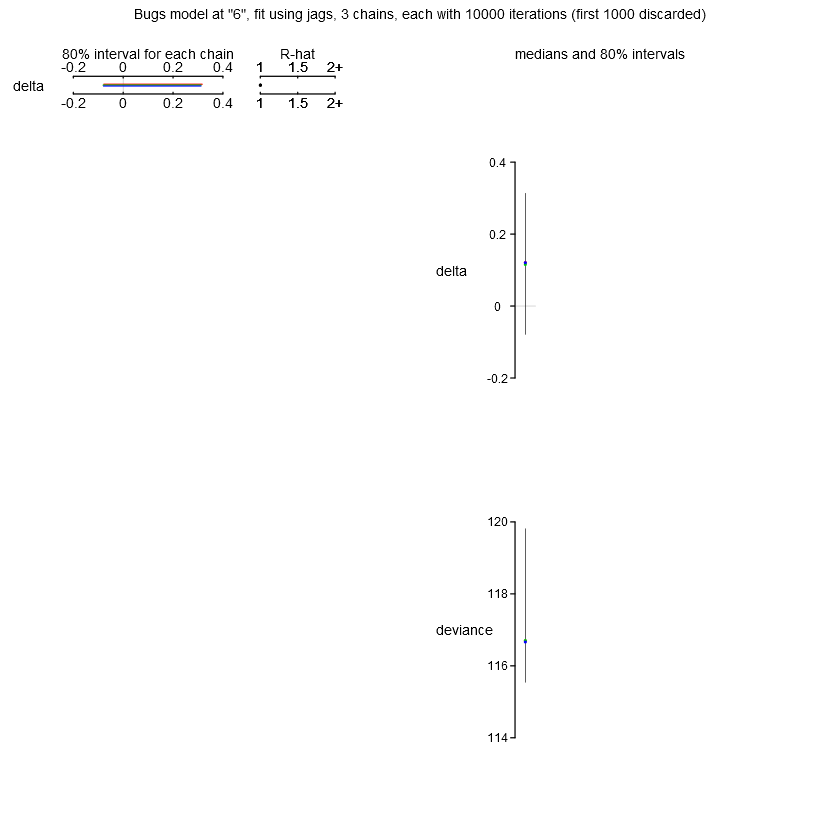

In [15]:
options(jupyter.plot_mimetypes = 'image/png')
# clears workspace:  
rm(list=ls()) 

#JARS
library(R2jags)

# Read data Dr. Smith
Winter = c(-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,
            0.17,0.17,0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,0.04,0.25,0.12)

Summer = c(0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,-0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,
            0.00,0.00,0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,0.00,0.50,0.00)

x = Winter-Summer # allowed because it is a within-subjects design
x = x/sd(x)       # standardize

ndata = length(Winter) # number of subjects

data  = list("x", "ndata") # to be passed on to JAGS

# inital value
myinits <- list(
  list(delta = rnorm(1,0,3), sigmatmp = rnorm(1,0,1)),
  list(delta = rnorm(1,0,3), sigmatmp = rnorm(1,0,1)),
  list(delta = rnorm(1,0,3), sigmatmp = rnorm(1,0,1)))

# Parameters to be monitored
parameters = c("delta")

# 1. Model
# One-Sample Comparison of Means
modelString = "
model{
  # Data
  for (i in 1:ndata){
    x[i] ~ dnorm(mu,lambda)
  } 
  mu <- delta*sigma
  lambda <- pow(sigma,-2)
  # delta and sigma Come From (Half) Cauchy Distributions
  lambdadelta ~ dchisqr(1)
  delta ~ dnorm(0,lambdadelta)
  lambdasigma ~ dchisqr(1)
  sigmatmp ~ dnorm(0,lambdasigma)
  sigma <- abs(sigmatmp)
  # Sampling from Prior Distribution for Delta
  deltaprior ~ dnorm(0,lambdadeltaprior)
  lambdadeltaprior ~ dchisqr(1)
}"

# The following command calls JAGS with specific options.
# For a detailed description see the R2jags documentation.
samples = jags(data, inits=myinits, parameters, 
               model.file=textConnection(modelString),
               n.chains=3, n.iter=10000, n.burnin=1000, n.thin=1, DIC=T)
# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

plot(samples)

In [16]:
# Collect posterior samples across all chains:
delta.posterior = samples$BUGSoutput$sims.list$delta  

#============ BFs based on logspline fit ===========================
library(polspline) # this package can be installed from within R
fit.posterior = logspline(delta.posterior)

# 95% confidence interval:
x0 = qlogspline(0.025,fit.posterior)
x1 = qlogspline(0.975,fit.posterior)

posterior = dlogspline(0, fit.posterior) # this gives the pdf at point delta = 0
prior     = dcauchy(0)                   # height of order--restricted prior at delta = 0
BF01      = posterior/prior
BF01

[1] 6.135529

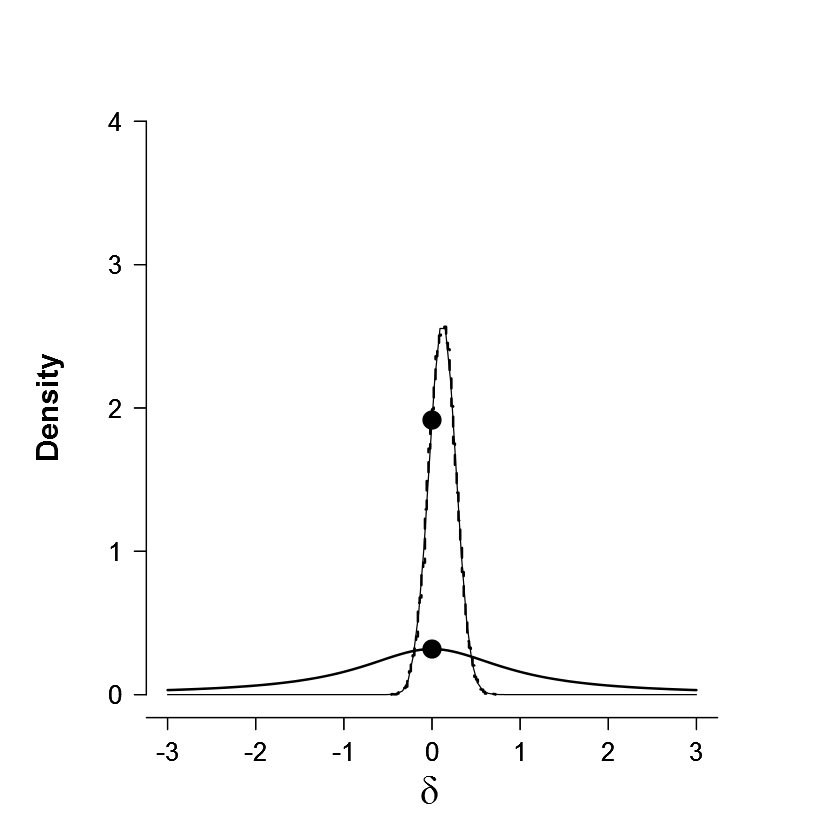

In [8]:
#============ Plot Prior and Posterior  ===========================
par(cex.main = 1.5, mar = c(5, 6, 4, 5) + 0.1, mgp = c(3.5, 1, 0), cex.lab = 1.5,
    font.lab = 2, cex.axis = 1.3, bty = "n", las=1)
xlow  = -3
xhigh = 3
yhigh = 4
Nbreaks = 80
y       = hist(delta.posterior, Nbreaks, plot=F)
plot(c(y$breaks, max(y$breaks)), c(0,y$density,0), type="S", lwd=2, lty=2,
     xlim=c(xlow,xhigh), ylim=c(0,yhigh), xlab=" ", ylab="Density", axes=F) 
axis(1, at = c(-4,-3,-2,-1,0,1,2,3,4), lab=c("-4","-3","-2","-1","0", "1", "2", "3", "4"))
axis(2)
mtext(expression(delta), side=1, line = 2.8, cex=2)
#now bring in log spline density estimation:
par(new=T)
plot(fit.posterior, ylim=c(0,yhigh), xlim=c(xlow,xhigh), lty=1, lwd=1, axes=F)
points(0, dlogspline(0, fit.posterior),pch=19, cex=2)
# plot the prior:
par(new=T)
plot ( function( x ) dcauchy( x, 0, 1 ), xlow, xhigh, ylim=c(0,yhigh), xlim=c(xlow,xhigh), lwd=2, lty=1, ylab=" ", xlab = " ", axes=F) 
axis(1, at = c(-4,-3,-2,-1,0,1,2,3,4), lab=c("-4","-3","-2","-1","0", "1", "2", "3", "4"))
axis(2)
points(0, dcauchy(0), pch=19, cex=2)

그래프에 따르면 $\delta$(effect size)의 사후분포가 0 근처에서 최대치를 이루며 음의 영역보다 양의 영역에서 확률분포가 크다.

$\delta=0$일때 사후분포는 사전분포보다 5배 크며, 

이것은 Bayer factor가 영가설(귀무가설) $H_0$을 5:1 비율로 지지한다.

#8.2 Order restricted one-sample comparison
앞장에서 Bayer factor를 $H_0 : \delta=0$ versus $H_1 : \delta \sim Cauchy(0,1)$ 지지 정도로 계산(5:1)하였다.
####Dr John의 주장은 Winter < Summer
####Dr Smith의 주장은 Winter > Summer
#### Dr Smith의 주장에 따라 SMM 가설 검증한다면 위와 같이 $H_1 : \delta \sim Cauchy(0,1)$이 아니라
#### $H_1$에 대한 $\delta$는 음수(Winter - Summer)가 되어야 함(Dr Jonh의 주장) $\delta = \frac{\mu}{\sigma}$
#### $H_2 : Cauchy(0,1)_{X(-\infty,0)}$, 이와 같은 대립 가설을 제약된 순서 혹은 단방향 가설이라고 함

#### $\delta$(effect size)에 대한 영가설(귀무가설)은 $H_0 : \delta=0$
#### 대립가설은 half Cauchy 분포(음수)를 가진다 : $H_2 : \delta \sim Cauchy(0,1)_{X(-\infty,0)}$
####$delta \sim Cauchy(0,1)_{X(-\infty),0}$  : effect size(음수의 Cauchy 분포)
####$\sigma \sim Cauchy(0,1)_{X(0,\infty)}$ : 표준편차(양수의 Cauchy 분포)
####$\mu \leftarrow \delta\sigma$ : 평균은 effect size와 표준편차의 곱
####$x_i \sim Gaussian(\mu, \frac{1}{\sigma^2})$ : 정밀도 $\lambda = \frac{1}{\sigma^2}$

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 55

Initializing model



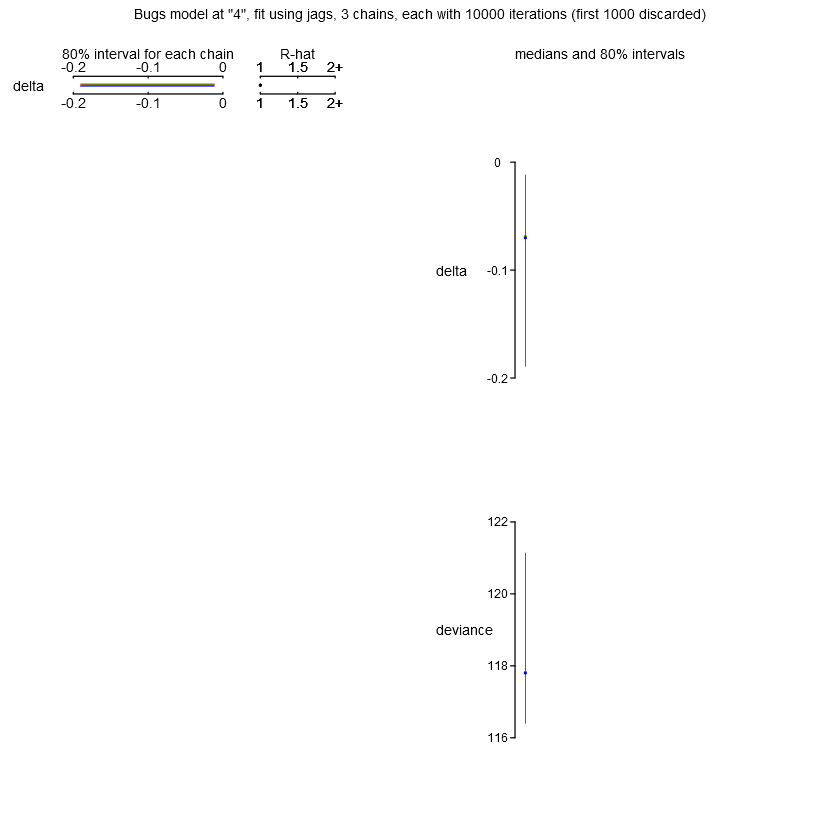

In [29]:
options(jupyter.plot_mimetypes = 'image/png')
# clears workspace:  
rm(list=ls()) 

#JARS
library(R2jags)

# Read data Dr. Smith
Winter = c(-0.05,0.41,0.17,-0.13,0.00,-0.05,0.00,0.17,0.29,0.04,0.21,0.08,0.37,0.17,0.08,-0.04,-0.04,0.04,-0.13,-0.12,0.04,0.21,0.17,
            0.17,0.17,0.33,0.04,0.04,0.04,0.00,0.21,0.13,0.25,-0.05,0.29,0.42,-0.05,0.12,0.04,0.25,0.12)

Summer = c(0.00,0.38,-0.12,0.12,0.25,0.12,0.13,0.37,0.00,0.50,0.00,0.00,-0.13,-0.37,-0.25,-0.12,0.50,0.25,0.13,0.25,0.25,0.38,0.25,0.12,
            0.00,0.00,0.00,0.00,0.25,0.13,-0.25,-0.38,-0.13,-0.25,0.00,0.00,-0.12,0.25,0.00,0.50,0.00)

x = Winter-Summer # allowed because it is a within-subjects design
x = x/sd(x)       # standardize

ndata = length(Winter) # number of subjects

data  = list("x", "ndata") # to be passed on to JAGS

# inital value
myinits = list(
  list(delta = -abs(rnorm(1,0,1)), sigmatmp = 0.1),
  list(delta = -abs(rnorm(1,0,1)), sigmatmp = 0.2),
  list(delta = -abs(rnorm(1,0,1)), sigmatmp = 0.3))

# Parameters to be monitored
parameters = c("delta")
# 1. Model
# One-Sample Order Restricted Comparison of Means
modelString = "
model{
  # Data
  for (i in 1:ndata){
    x[i] ~ dnorm(mu,lambda)
  } 
  mu <- delta*sigma
  lambda <- pow(sigma,-2)
  # delta and sigma Come From (Half) Cauchy Distributions
  lambdadelta ~ dchisqr(1)
  delta ~ dnorm(0,lambdadelta)T(,0)
  lambdasigma ~ dchisqr(1)
  sigmatmp ~ dnorm(0,lambdasigma)
  sigma <- abs(sigmatmp)
  # Sampling from Prior Distribution for Delta
  deltaprior ~ dnorm(0,lambdadeltaprior)T(,0)
  lambdadeltaprior ~ dchisqr(1)
}"

# The following command calls JAGS with specific options.
# For a detailed description see the R2jags documentation.
samples = jags(data, inits=myinits, parameters, 
               model.file=textConnection(modelString),
               n.chains=3, n.iter=10000, n.burnin=1000, n.thin=1, DIC=T)


# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

plot(samples)

In [30]:
# Collect posterior samples across all chains:
delta.posterior <- samples$BUGSoutput$sims.list$delta  

#============ BFs based on logspline fit ===========================
library(polspline) # this package can be installed from within R
fit.posterior <- logspline(delta.posterior)

# 95% confidence interval:
x0 <- qlogspline(0.025,fit.posterior)
x1 <- qlogspline(0.975,fit.posterior)

posterior <- dlogspline(0, fit.posterior) # this gives the pdf at point delta = 0
prior     <- dcauchy(0)                   # height of order--restricted prior at delta = 0
BF01      <- posterior/prior
BF01

[1] 7.61983

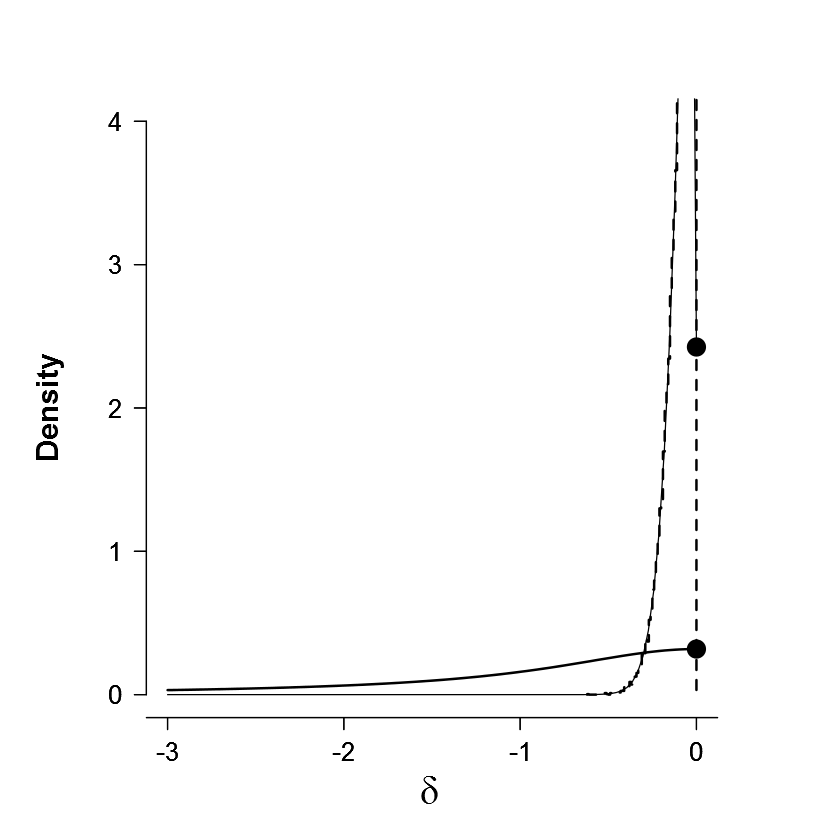

In [33]:
#============ Plot Prior and Posterior  ===========================
par(cex.main = 1.5, mar = c(5, 6, 4, 5) + 0.1, mgp = c(3.5, 1, 0), cex.lab = 1.5,
    font.lab = 2, cex.axis = 1.3, bty = "n", las=1)
xlow  <- -3
xhigh <- 0
yhigh <- 4
Nbreaks <- 80
y       <- hist(delta.posterior, Nbreaks, plot=F)
plot(c(y$breaks, max(y$breaks)), c(0,y$density,0), type="S", lwd=2, lty=2,
     xlim=c(xlow,xhigh), ylim=c(0,yhigh), xlab=" ", ylab="Density", axes=F) 
axis(1, at = c(-4,-3,-2,-1,0,1,2,3,4), lab=c("-4","-3","-2","-1","0", "1", "2", "3", "4"))
axis(2)
mtext(expression(delta), side=1, line = 2.8, cex=2)
#now bring in log spline density estimation:
par(new=T)
plot(fit.posterior, ylim=c(0,yhigh), xlim=c(xlow,xhigh), lty=1, lwd=1, axes=F)
points(0, dlogspline(0, fit.posterior),pch=19, cex=2)
# plot the prior:
par(new=T)
plot ( function( x ) dcauchy( x, 0, 1 ), xlow, xhigh, ylim=c(0,yhigh), xlim=c(xlow,xhigh), lwd=2, lty=1, ylab=" ", xlab = " ", axes=F) 
axis(1, at = c(-4,-3,-2,-1,0,1,2,3,4), lab=c("-4","-3","-2","-1","0", "1", "2", "3", "4"))
axis(2)
points(0, dcauchy(0), pch=19, cex=2)

그래프에 따르면 $\delta=0$(effect size)일때

Bayer factor를 $H_0 : \delta=0$ versus $H_2 : \delta \sim Cauchy(0,1)_{X(-\infty,0)}$ 계산하며

$\delta=0$일때 사후분포는 사전분포보다 7.6배 크며, 

이것은 Bayer factor가 영가설(귀무가설) $H_0$을 7.6:1 비율로 지지한다.

#8.3 Two-Sample Comparison
인지과학에서는 두개의 독립적인 그룹의 데이터의 평균의 비교를 자주한다.

두개의 샘플에 대한 t-test는 표준 빈도주의자가 일반적으로 사용한다.

예제에서는 맹물을 마실때(effect of drinking plain)와 과산화수소를 마실때의 효과(oxygenated water)를 비교한다.

각 샘플은 20개의 데이터로 구성되어 

과산화수소 마실때(x) : (70,80,79,83,77,75,84,78,75,75,78,82,74,81,72,70,75,72,76,77)

맹물 마실때(y) : (56,80,63,62,67,71,68,76,79,67,76,74,67,70,62,65,72,72,69,71)

In [1]:
# oxygenated water
x = c(70,80,79,83,77,75,84,78,75,75,78,82,74,81,72,70,75,72,76,77)
mean(x)
sd(x)

[1] 76.65

[1] 4.05586

In [2]:
# plain water
y=c(56,80,63,62,67,71,68,76,79,67,76,74,67,70,62,65,72,72,69,71)
mean(y)
sd(y)

[1] 69.35

[1] 6.072154

In [3]:
#t-test
# t value is 4.47, p-value is 0.00008625
# p-value < 0.01, so H0(there is no difference) rejected
options(scipen=999)
t.test(x,y,"two.sided")


	Welch Two Sample t-test

data:  x and y
t = 4.4708, df = 33.139, p-value = 0.00008625
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.978563 10.621437
sample estimates:
mean of x mean of y 
    76.65     69.35 


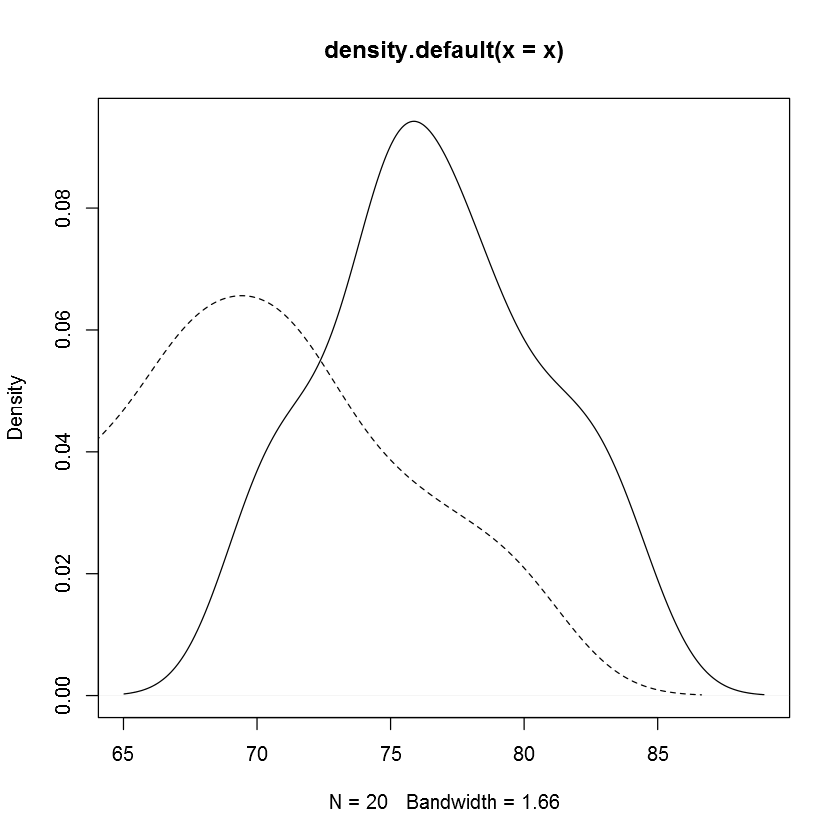

In [4]:
# 2. Density
options(jupyter.plot_mimetypes = 'image/png')
plot(density(x))
lines(density(y), lty=2)

####  평균에 대한 추론을 베이지안 접근을 하기 위하여 평균을 0과 표준 편차를 1로하는 스케일링 수행
####z변환은 평균 u, 표준편차 σ인 정규확률변수를 
####평균 0, 표준편차 1인 표준정규확율변수로 바꿔준다.
####z변환 
$$z=\frac{x-u}{\sigma}$$

In [8]:
# oxygenated water
x = c(70,80,79,83,77,75,84,78,75,75,78,82,74,81,72,70,75,72,76,77)
# plain water
y=c(56,80,63,62,67,71,68,76,79,67,76,74,67,70,62,65,72,72,69,71)
# Rescale
zy = (y-mean(x))/sd(x)
zx = (x-mean(x))/sd(x)

#t-test
# t value is 4.4708 p-value is 0.00008625
# p-value < 0.01, so H0(there is no difference) rejected
options(scipen=999)
t.test(zx,zy,"two.sided")


	Welch Two Sample t-test

data:  zx and zy
t = 4.4708, df = 33.139, p-value = 0.00008625
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.980942 2.618788
sample estimates:
               mean of x                mean of y 
-0.000000000000001405838 -1.799864905433614659103 


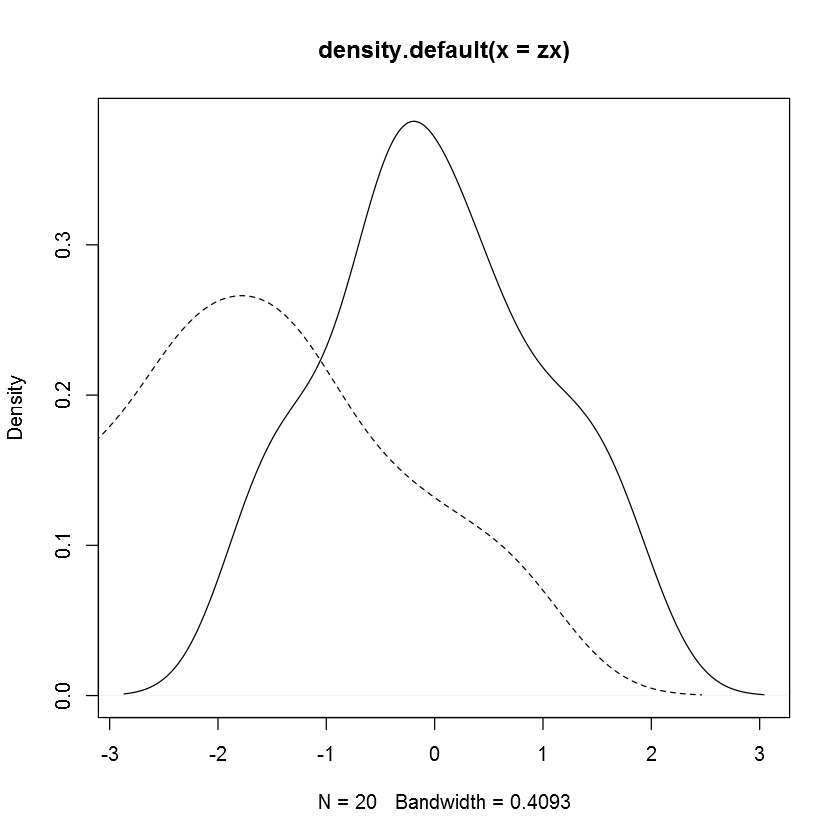

In [9]:
plot(density(zx))
lines(density(zy), lty=2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 60

Initializing model



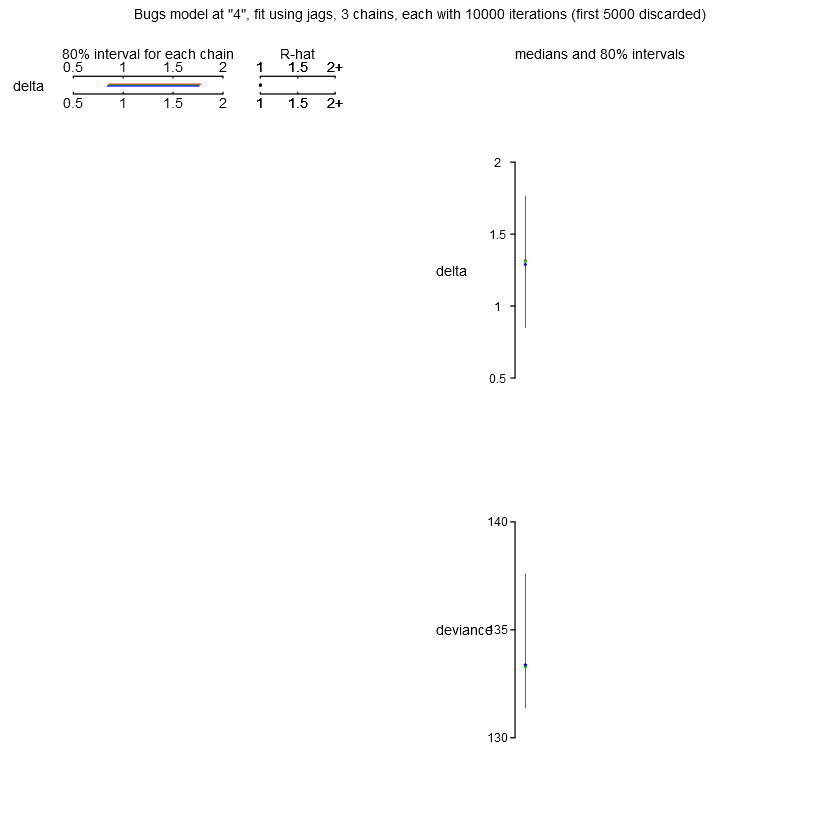

In [15]:
options(jupyter.plot_mimetypes = 'image/png')
# clears workspace:  
rm(list=ls()) 

#JARS
library(R2jags)

# oxygenated water
x = c(70,80,79,83,77,75,84,78,75,75,78,82,74,81,72,70,75,72,76,77)
# plain water
y = c(56,80,63,62,67,71,68,76,79,67,76,74,67,70,62,65,72,72,69,71)

n1 = length(x)
n2 = length(y)

# Rescale
y = y - mean(x)
y = y/sd(x)
x = (x-mean(x))/sd(x); 

data <- list("x", "y", "n1", "n2") # to be passed on to JAGS

myinits <- list(
  list(delta = rnorm(1,0,3), mu = rnorm(1,0,1), sigmatmp = runif(1,0,5)),
  list(delta = rnorm(1,0,3), mu = rnorm(1,0,1), sigmatmp = runif(1,0,5)),
  list(delta = rnorm(1,0,3), mu = rnorm(1,0,1), sigmatmp = runif(1,0,5)))


# Parameters to be monitored
parameters = c("delta")

# 1. Model
# Two-sample Comparison of Means
modelString = "
model{ 
  # Data
  for (i in 1:n1){
    x[i] ~ dnorm(mux,lambda)
  }
  for (j in 1:n2){
    y[j] ~ dnorm(muy,lambda)
  }
  # Means and precision
  alpha <- delta*sigma
  mux <- mu+alpha/2	
  muy <- mu-alpha/2
  lambda <- pow(sigma,-2)
  # delta, mu, and sigma Come From (Half) Cauchy Distributions
  lambdadelta ~ dchisqr(1)
  delta ~ dnorm(0,lambdadelta)
  lambdamu ~ dchisqr(1)
  mu ~ dnorm(0,lambdamu)
  lambdasigma ~ dchisqr(1)
  sigmatmp ~ dnorm(0,lambdasigma)
  sigma <- abs(sigmatmp)
  # Sampling from Prior Distribution for Delta
  lambdadeltaprior ~ dchisqr(1)
  deltaprior ~ dnorm(0,lambdadeltaprior)
}"

# The following command calls JAGS with specific options.
# For a detailed description see the R2jags documentation.
samples = jags(data, inits=myinits, parameters, 
               model.file=textConnection(modelString),
               n.chains=3, n.iter=10000, n.burnin=5000, n.thin=1, DIC=T)


# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

plot(samples)

# Collect posterior samples across all chains:
delta.posterior <- samples$BUGSoutput$sims.list$delta  

In [16]:
#============ BFs based on logspline fit ===========================
library(polspline) # this package can be installed from within R
fit.posterior <- logspline(delta.posterior)

# 95% confidence interval:
x0 <- qlogspline(0.025,fit.posterior)
x1 <- qlogspline(0.975,fit.posterior)

posterior <- dlogspline(0, fit.posterior) # this gives the pdf at point delta = 0
prior     <- dcauchy(0)                   # height of order--restricted prior at delta = 0
BF01      <- posterior/prior
BF01

[1] 0.005218207

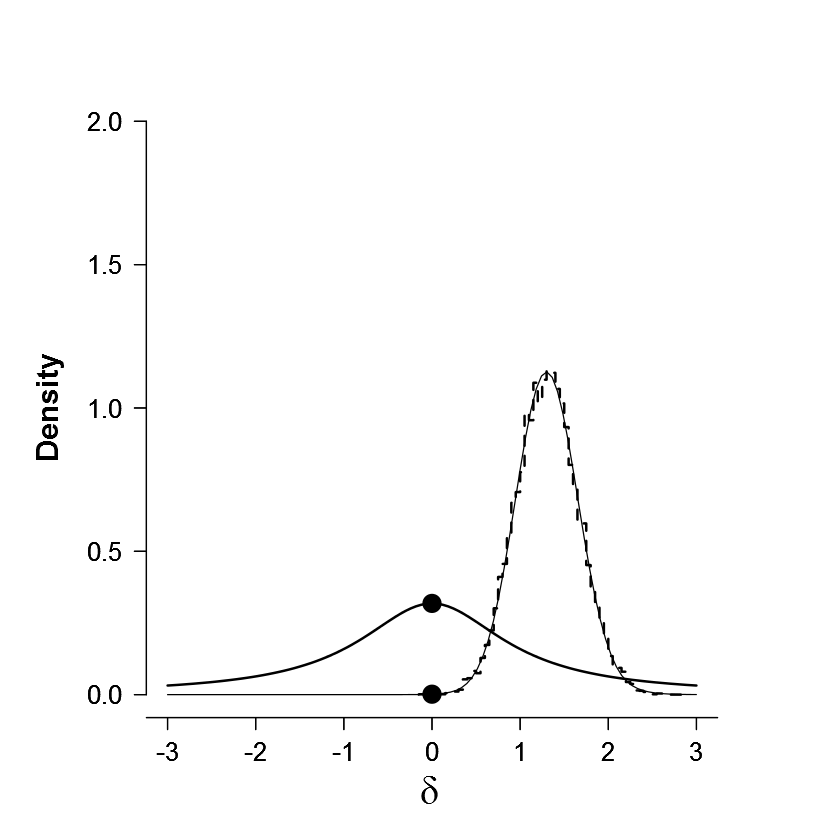

In [17]:
#============ Plot Prior and Posterior  ===========================
par(cex.main = 1.5, mar = c(5, 6, 4, 5) + 0.1, mgp = c(3.5, 1, 0), cex.lab = 1.5,
    font.lab = 2, cex.axis = 1.3, bty = "n", las=1)
xlow  <- -3
xhigh <- 3
yhigh <- 2
Nbreaks <- 80
y       <- hist(delta.posterior, Nbreaks, plot=F)
plot(c(y$breaks, max(y$breaks)), c(0,y$density,0), type="S", lwd=2, lty=2,
     xlim=c(xlow,xhigh), ylim=c(0,yhigh), xlab=" ", ylab="Density", axes=F) 
axis(1, at = c(-4,-3,-2,-1,0,1,2,3,4), lab=c("-4","-3","-2","-1","0", "1", "2", "3", "4"))
axis(2)
mtext(expression(delta), side=1, line = 2.8, cex=2)
#now bring in log spline density estimation:
par(new=T)
plot(fit.posterior, ylim=c(0,yhigh), xlim=c(xlow,xhigh), lty=1, lwd=1, axes=F)
points(0, dlogspline(0, fit.posterior),pch=19, cex=2)
# plot the prior:
par(new=T)
plot ( function( x ) dcauchy( x, 0, 1 ), xlow, xhigh, ylim=c(0,yhigh), xlim=c(xlow,xhigh), lwd=2, lty=1, ylab=" ", xlab = " ", axes=F) 
axis(1, at = c(-4,-3,-2,-1,0,1,2,3,4), lab=c("-4","-3","-2","-1","0", "1", "2", "3", "4"))
axis(2)
points(0, dcauchy(0), pch=19, cex=2)
